In [ ]:

### Project proposal

Summary of datasets:

Players_data:
196 rows and 7 columns:
- age, mean = 21.14, min = 9.00, max = 58.00
- subscribe (to newsletter)
- name, name of player
- gender, 1.02% agender, 18.88% female, 63.26% male, 7.65% non-binary, 0.51% other, 5.61% prefer not to say, 3.06% two-spirited
- experience, 17.85% beginner, 32.14% amateur, 18.37% regular, 7.14% pro, 24.49% veteran  
- played_hours, mean = 5.84 hours, min = 0.00 hours, max = 223.10 hours                                                                                           
Issues from the data:
- Data from the gender column "prefer not to say" can pose problems when finding statistics of 
the players as this is 5.61% of the database. Same with some Age data being "NA", which can cause issues if kept in predictions.
- Some data can be entered incorrectly, people may claim to be the level that they are not
- Measurement error in time played due to lag/error in the data collection


Sessions_data: 
1535 rows, 5 columns: 
- start_time, the time session started
- end_time, the time session ended
- original_start_time, the miniscule time session started
- original_end_time, the miniscule time session ended


This data has numerical variables, errors with technology (capturing minuscule times) and other network errors are 
possible entry errors. I can see that the original start and end time yield the same values, which may pose a problem
when modeling the data and should be wrangled into a better form. 

I will address the broad question: We want to know which "kinds" of players are likely to contribute a large amount of data
so that we can target those players in recruiting efforts.
I will address a specific question: Can the age and gender of the player predict the output played hours in the dataset players_data?
To find answers to this question, I can use visuals and predictor engines to find patterns. To wrangle the data, I can isolate the player profile columns
(age and gender) and the played_hours column using select(), then I can remove any unknown entries such as "prefer not to say" or "NA" in the gender  and age columns using filter(), 
as this data isnt contributing to our findings and only takes up around 5.61% of the data. This specific question will help determine which group of people to target in recruitment, 
which will make it easier to reach out to the most important crowd of people to maximize effiency in the recruitment process. 




###Methods and plan 


We can use KNN regression to predict this variable, 
however the gender column must be turned into a numeric variable that corresponds to the gender of the predicted player.    




In [2]:
library(tidyverse) #needed for this exploration

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#Below are the mean values for the quantitative (and gender) predictor variables in players_data:

In [10]:
#proportion of each gender as percentages

prop_gender <- players_data |>
count(gender) |>
mutate(proportion = n / sum(n) * 100)
prop_gender

gender,n,proportion
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


In [28]:
#mean, max, and min of age

age_table <- tibble(
    statistic = c("Mean_age", "Minimum_age", "Maximum_age"), value = c(mean_age, min_age, max_))
age_table


statistic,value
<chr>,<dbl>
Mean_age,21.13918
Minimum_age,9.00000
Maximum_age,58.00000


In [ ]:
#below I will wrangle the players_data dataset

In [ ]:
# I will select the data needed for exploration, and I will remove rows where gender is "prefer not to say" and where age is NA

In [38]:
players_tidy <- players_data |>
select(Age, gender, played_hours) |>
filter(Age != "NA", gender != "Prefer not to say")
players_tidy

Age,gender,played_hours
<dbl>,<chr>,<dbl>
9,Male,30.3
17,Male,3.8
17,Male,0.0
21,Female,0.7
21,Male,0.1
17,Female,0.0
19,Female,0.0
21,Male,0.0
47,Male,0.1


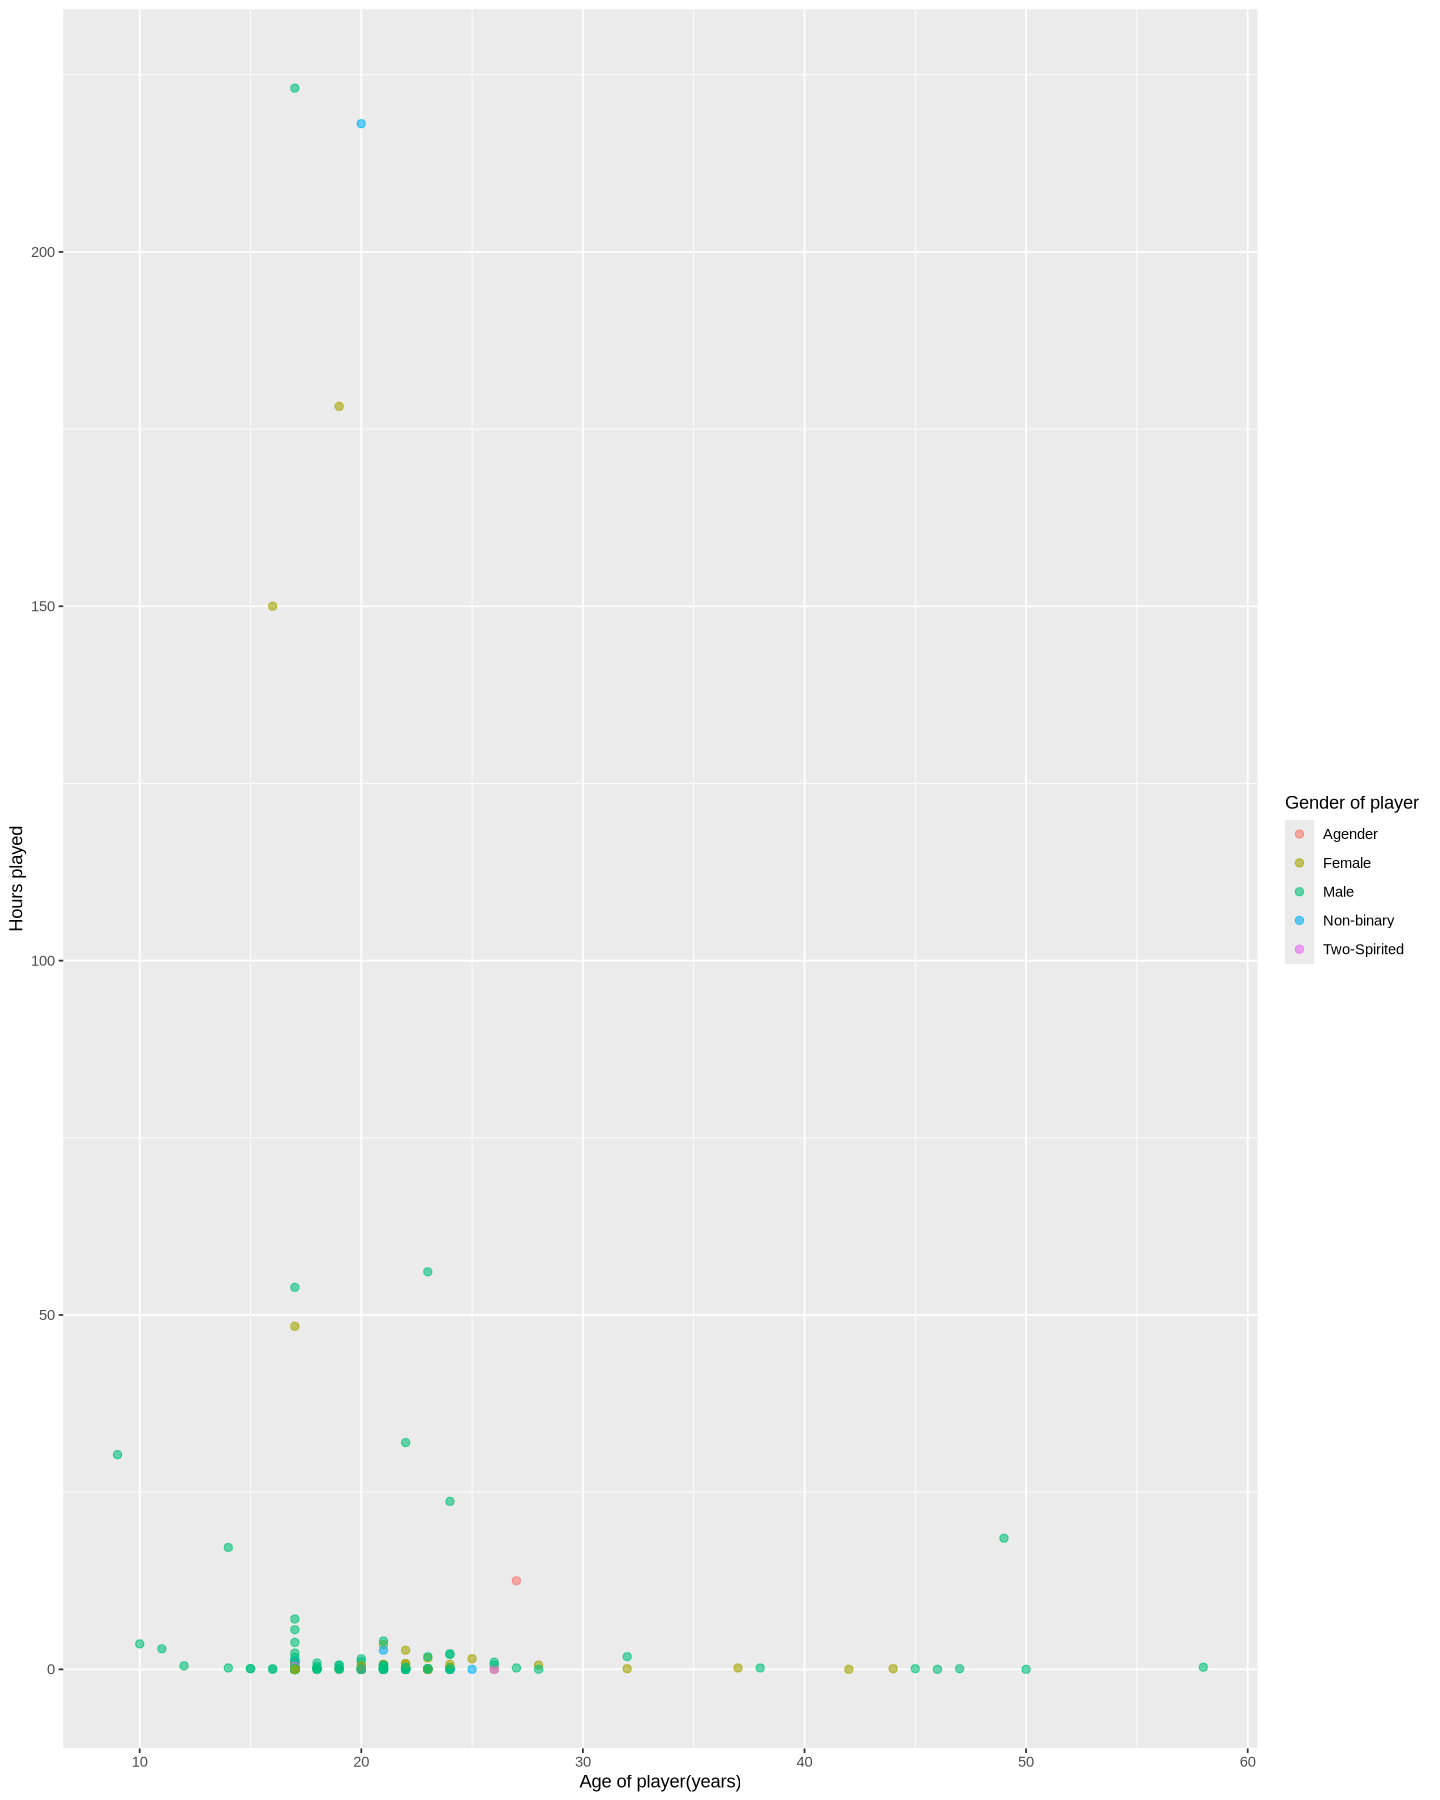

In [44]:
# I can do some visual analysis to help see patterns in the data, here is a scatter plot

options(repr.plot.width = 12, repr.plot.height = 15)
age_plot <- players_tidy |>
ggplot(aes(x = Age, y = played_hours, color = gender)) +
geom_point(size = 2, alpha = 0.6) +
labs(x = "Age of player(years)", y = "Hours played", color = "Gender of player")

age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


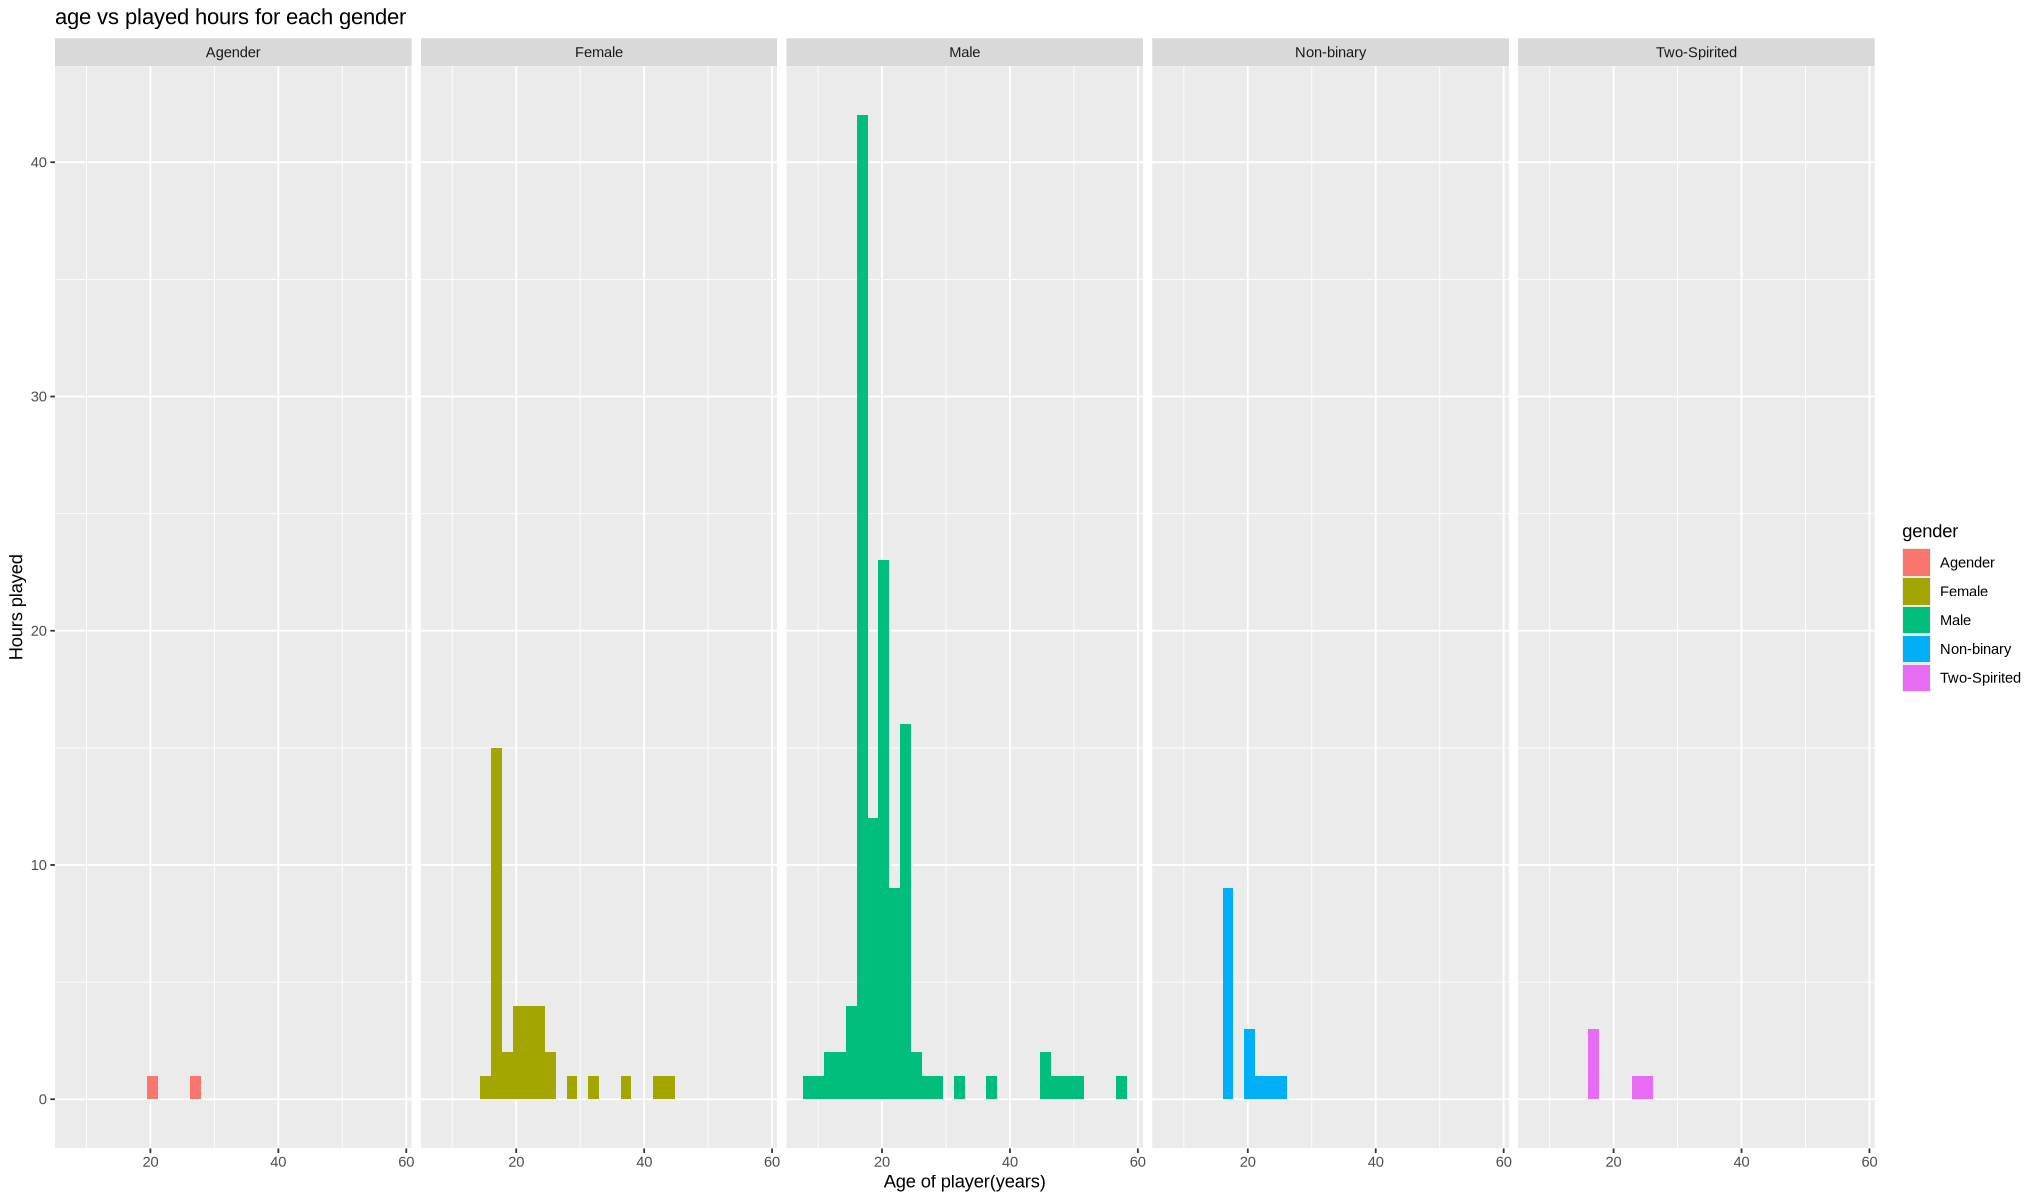

In [47]:
#the scatter plot is somewhat reluctant to show a pattern, we can try a histogram plot

options(repr.plot.width = 17, repr.plot.height = 10)
age_histo <- players_tidy |>
ggplot(aes(x = Age, fill = gender)) +
geom_histogram() +
facet_grid(.~gender) +
labs(x = "Age of player(years)", y = "Hours played", title = "age vs played hours for each gender")

age_histo

In [33]:
#these datasets can be successfully loaded into the notebook
players_data <- read_csv("DATA/players.csv") 
sessions_data <- read_csv("DATA/sessions.csv")
players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [ ]:
#all work below is rough work used to make values for summary stats

In [27]:
mean_age <- players_data |>
summarize(mean_age = mean(Age, na.rm = TRUE)) |>
pull(mean_age)
min_age <- players_data |>
summarize(min_age = min(Age, na.rm  = TRUE)) |>
pull(min_age)
max_age <- players_data |>
summarize(max_age = max(Age, na.rm = TRUE)) |>
pull(max_age)
mean_age
min_age
max_age

[1] 21.13918

[1] 9

[1] 58

In [39]:
prop_level <- players_data |>
count(experience) |>
mutate(prop = n / sum(n) * 100)
prop_level

experience,n,prop
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


In [5]:
prop_gender <- players_data |>
count(gender) |>
mutate(prop = n / sum(n) * 100)
prop_gender

gender,n,prop
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


In [25]:
mean_hours <- players_data |>
summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
pull(mean_hours)
min_hours <- players_data |>
summarize(min_hours = min(played_hours, na.rm  = TRUE)) |>
pull(min_hours)
max_hours <- players_data |>
summarize(max_hours = max(played_hours, na.rm = TRUE)) |>
pull(max_hours)
mean_hours
min_hours
max_hours

[1] 5.845918

[1] 0

[1] 223.1